# Data Exploration and Visualization<a class="anchor" id="id"></a>

## INDEX:
* [Data Summary](#summary)
* [Column Analysis](#columns)
    * [AnimalID](#aid)
    * [Name](#name)
    * [DateTime](#datetime)
    * [OutcomeType and OutcomeSubtype](#outcome)
    * [AnymapType](#animaltype)
    * [SexuponOutcome](#sex)
    * [AgeuponOutcome](#age)
    * [Breed](#breed)
    * [Color](#color)

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Procedure for forecasting timeseries data
from fbprophet import Prophet
# python3 print
from __future__ import print_function
from datetime import datetime
# Importing seaborn to avoid 90'ish colors in graphs
import seaborn

### Data Summary <a class="anchor" id="summary"></a>

General data summary of the CSV file used in the project.

In [2]:
# Read the file
# Downloaded from: https://www.kaggle.com/c/shelter-animal-outcomes/data
data = pd.read_csv("data.csv")

In [3]:
# Show first two rows
data.head(2)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby


In [4]:
# Count of rows
data.shape[0]

26729

In [5]:
# Count of columns
data.shape[1]

10

In [6]:
# Number of NaN per column
pd.isnull(data).sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

[INDEX](#id)

## Columns <a class="anchor" id="columns"></a>

Analysis of the data stored on each column.

[INDEX](#id)

### AnimalID <a class="anchor" id="aid"></a>

In [7]:
# Check if it is actually a unique ID.
# Number of unique values
data["AnimalID"].unique().shape[0]

26729

[INDEX](#id)

### Name <a class="anchor" id="name"></a>

In [8]:
# Global Most used names, Top 10
data["Name"].value_counts().head(10)

Max         136
Bella       135
Charlie     107
Daisy       106
Lucy         94
Buddy        87
Princess     86
Rocky        85
Luna         68
Jack         66
Name: Name, dtype: int64

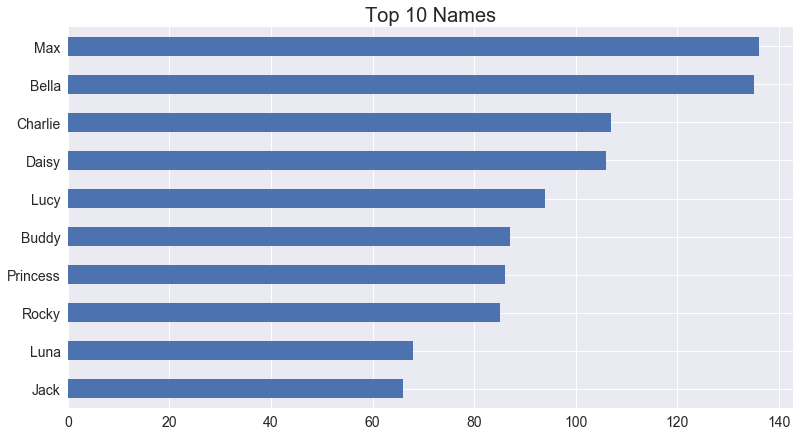

In [9]:
data["Name"].value_counts(ascending=True).tail(10).plot(kind="barh",figsize=(13,7),fontsize=14)
plt.title('Top 10 Names', fontsize=20)
plt.show()

In [10]:
# Dogs Most used names, Top 10
data[data["AnimalType"]=="Dog"]["Name"].value_counts().head(10)

Bella       113
Max         112
Charlie      89
Daisy        86
Buddy        78
Rocky        77
Lucy         76
Princess     72
Chico        53
Lola         53
Name: Name, dtype: int64

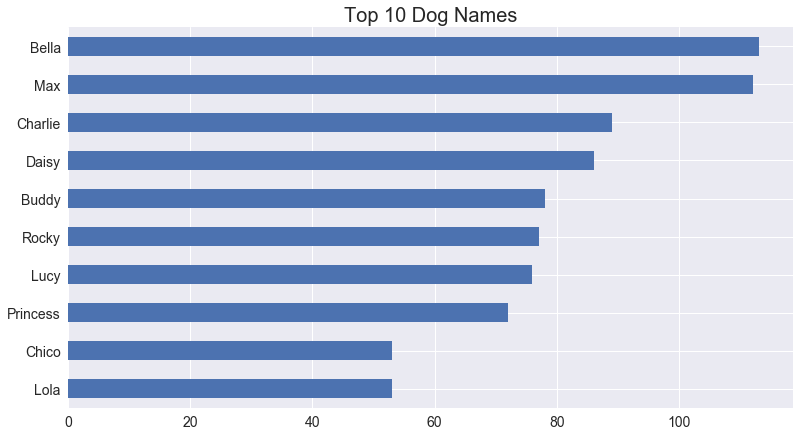

In [11]:
data[data["AnimalType"]=="Dog"]["Name"].value_counts(ascending=True).tail(10).plot(kind="barh",figsize=(13,7),fontsize=14)
plt.title("Top 10 Dog Names", fontsize=20)
plt.show()

In [12]:
# Cats Most used names, Top 10
data[data["AnimalType"]=="Cat"]["Name"].value_counts().head(10)

Oliver     25
Max        24
Bella      22
Lily       21
X          21
Oreo       20
Daisy      20
Sam        18
Luna       18
Charlie    18
Name: Name, dtype: int64

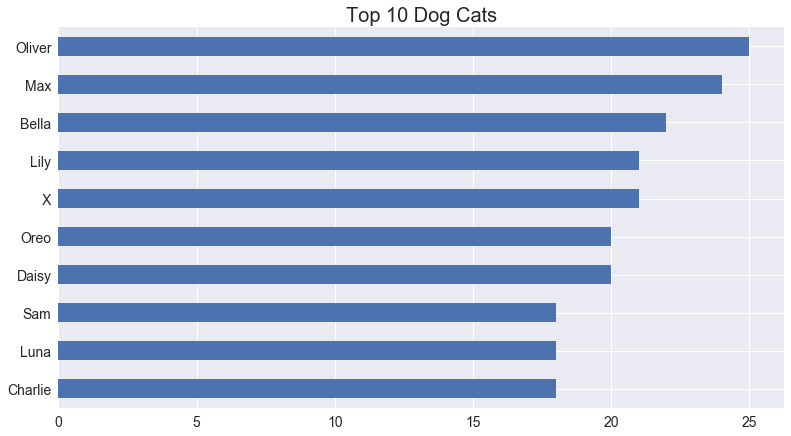

In [13]:
data[data["AnimalType"]=="Cat"]["Name"].value_counts(ascending=True).tail(10).plot(kind="barh",figsize=(13,7),fontsize=14)
plt.title("Top 10 Dog Cats", fontsize=20)
plt.show()

In [14]:
# Number of Dogs and Cats without name
data[data["Name"].isnull()].groupby(["AnimalType"]).size()

AnimalType
Cat    5019
Dog    2672
dtype: int64

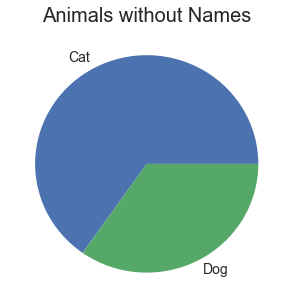

In [15]:
data[data["Name"].isnull()].groupby(["AnimalType"]).size().plot(kind="pie", figsize=(5,5),fontsize=14)
plt.title("Animals without Names", fontsize=20)
plt.ylabel("")
plt.show()

[INDEX](#id)

### DateTime <a class="anchor" id="datetime"></a>

In [16]:
# Oldest record
data["DateTime"].sort_values().head(1)

5000    2013-10-01 09:31:00
Name: DateTime, dtype: object

In [17]:
# Newest receord
data["DateTime"].sort_values().tail(1)

16217    2016-02-21 19:17:00
Name: DateTime, dtype: object

In [18]:
# To correctly analize this column, data will be separated in four columns.
# - YEAR
# - MONTH
# - DAY OF THE WEEK (1-7)
# - DAY (1-31)
# 2014-02-12 18:22:00
def clean_year(data):
    dt = datetime.strptime(data,"%Y-%m-%d %X")
    return dt.year
def clean_month(data):
    dt = datetime.strptime(data,"%Y-%m-%d %X")
    return dt.month
def clean_day_of_the_week(data):
    dt = datetime.strptime(data,"%Y-%m-%d %X")
    return dt.weekday()
def clean_date(data):
    dt = datetime.strptime(data,"%Y-%m-%d %X")
    return datetime.date(dt)
def clean_hour(data):
    dt = datetime.strptime(data,"%Y-%m-%d %X")
    return dt.hour

data["Year"] = data["DateTime"].apply(clean_year)
data["Month"] = data["DateTime"].apply(clean_month)
data["DayoftheWeek"] = data["DateTime"].apply(clean_day_of_the_week)
data["Hour"] = data["DateTime"].apply(clean_hour)

In [19]:
# Animals per year
data.groupby("Year").size()

Year
2013     2702
2014    11179
2015    11481
2016     1367
dtype: int64

In [20]:
# Animals per type per year
data.groupby(["Year","AnimalType"]).size()

Year  AnimalType
2013  Cat           1074
      Dog           1628
2014  Cat           4674
      Dog           6505
2015  Cat           4974
      Dog           6507
2016  Cat            412
      Dog            955
dtype: int64

In [21]:
# Animals per month on 2014 and 2015 (years with full data)
data[data["Year"].isin([2014, 2015])].groupby("Month").size()

Month
1     1511
2     1329
3     1498
4     1689
5     2094
6     2319
7     2506
8     2172
9     2004
10    1907
11    1865
12    1766
dtype: int64

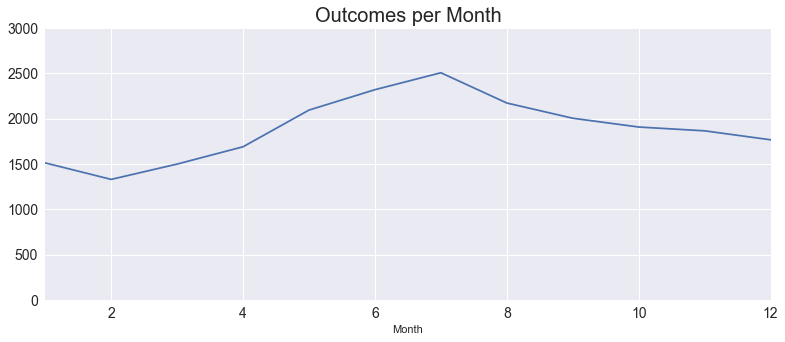

In [22]:
data[data["Year"].isin([2014, 2015])].groupby("Month").size().plot(kind="line",figsize=(13,5),ylim=(0,3000),fontsize=14)
plt.title("Outcomes per Month", fontsize=20)
plt.show()

In [23]:
# Animals per type per year
data.groupby(["Month","AnimalType"]).size()

Month  AnimalType
1      Cat            726
       Dog           1608
2      Cat            510
       Dog           1363
3      Cat            439
       Dog           1059
4      Cat            616
       Dog           1073
5      Cat            897
       Dog           1197
6      Cat           1206
       Dog           1113
7      Cat           1375
       Dog           1131
8      Cat           1086
       Dog           1086
9      Cat            938
       Dog           1066
10     Cat           1269
       Dog           1612
11     Cat           1057
       Dog           1611
12     Cat           1015
       Dog           1676
dtype: int64

In [24]:
# Animals per day of the week
data.groupby("DayoftheWeek").size()

DayoftheWeek
0    3696
1    3896
2    3510
3    3376
4    3586
5    4348
6    4317
dtype: int64

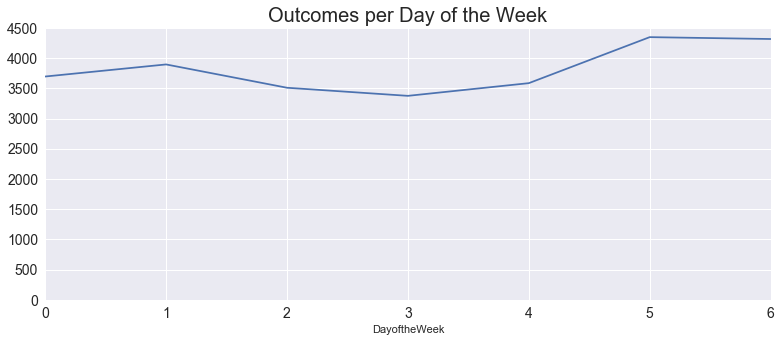

In [25]:
data.groupby("DayoftheWeek").size().plot(kind="line",ylim=(0,4500),figsize=(13,5),fontsize=14)
plt.title("Outcomes per Day of the Week", fontsize=20)
plt.show()

In [26]:
# Animals per day of the Week
data.groupby(["DayoftheWeek","AnimalType"]).size()

DayoftheWeek  AnimalType
0             Cat           1468
              Dog           2228
1             Cat           1793
              Dog           2103
2             Cat           1515
              Dog           1995
3             Cat           1307
              Dog           2069
4             Cat           1484
              Dog           2102
5             Cat           1863
              Dog           2485
6             Cat           1704
              Dog           2613
dtype: int64

In [27]:
# Forecasting time series, time-ahead capacity planning
data["Date"] = data["DateTime"].apply(clean_date)
data_per_day = data.groupby("Date").size()
series = data_per_day.to_frame()
series = series.reset_index()
series.columns = ["ds", "y"]
# Remove outliers
series = series.drop(series[series.y > 70].index)
m = Prophet()
m.fit(series);

In [28]:
# What will happen in next 3 years?
future = m.make_future_dataframe(periods=365*3)
future['cap'] = 45
forecast = m.predict(future)

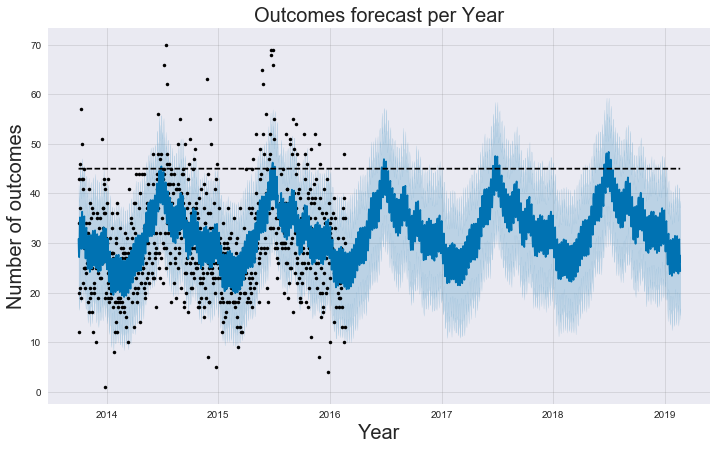

In [29]:
m.plot(forecast)
plt.title("Outcomes forecast per Year",fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of outcomes",fontsize=20)
plt.show()

[INDEX](#id)

### AnimalType <a class="anchor" id="animaltype"></a>

In [30]:
# Number of dogs and cats
data["AnimalType"].value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

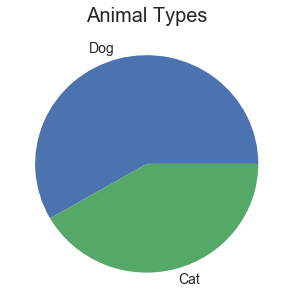

In [31]:
data["AnimalType"].value_counts().plot(kind="pie", figsize=(5,5),fontsize=14)
plt.title("Animal Types", fontsize=20)
plt.ylabel("")
plt.show()

### OutcomeType and OutcomeSubtype <a class="anchor" id="outcome"></a>

In [32]:
# OutcomeType count
total_outcome = data["OutcomeType"].value_counts().sort_index()
outcome_dogs = data[data["AnimalType"]=="Dog"]["OutcomeType"].value_counts().sort_index()
outcome_cats = data[data["AnimalType"]=="Cat"]["OutcomeType"].value_counts().sort_index()

outcomes = {"Total" : [total_outcome[0],total_outcome[1],total_outcome[2],total_outcome[3],total_outcome[4]],
     "Dogs" : [outcome_dogs[0],outcome_dogs[1],outcome_dogs[2],outcome_dogs[3],outcome_dogs[4]],
     "Cats" : [outcome_cats[0],outcome_cats[1],outcome_cats[2],outcome_cats[3],outcome_cats[4]]}

outcomes = pd.DataFrame(data=outcomes,index=["Adoption", "Died", "Euthanasia", "Return_to_owner", "Transfer"])
outcomes

,Cats,Dogs,Total
Adoption,4272,6497,10769
Died,147,50,197
Euthanasia,710,845,1555
Return_to_owner,500,4286,4786
Transfer,5505,3917,9422


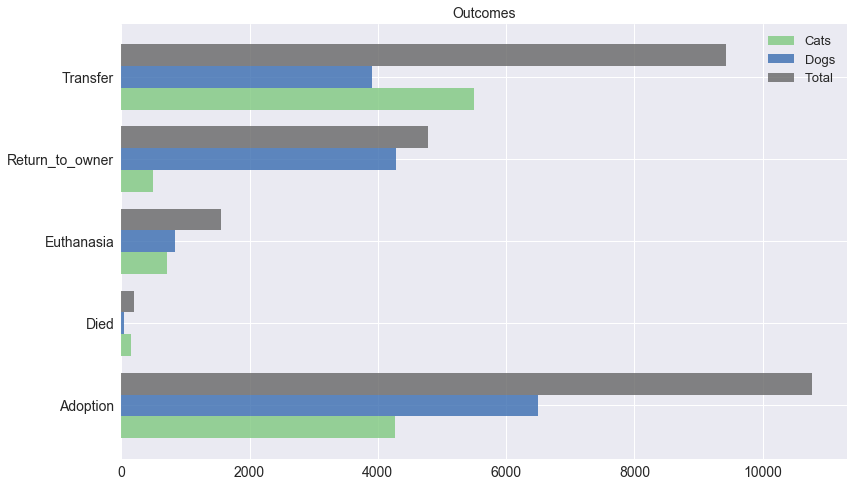

In [33]:
outcomes.plot(kind="barh",stacked=False,fontsize=14,alpha=0.8,colormap="Accent",figsize=(13,8),width=0.8)
plt.title("Outcomes", fontsize=14)
plt.legend(loc=1,prop={'size':13})
plt.show()

In [34]:
# Outcomes in Summer
data[data["Month"].isin([6, 7, 8])].groupby("Month")["OutcomeType"].value_counts()

Month  OutcomeType    
6      Transfer            969
       Adoption            830
       Return_to_owner     332
       Euthanasia          161
       Died                 27
7      Adoption           1151
       Transfer            864
       Return_to_owner     317
       Euthanasia          145
       Died                 29
8      Adoption            955
       Transfer            791
       Return_to_owner     298
       Euthanasia          111
       Died                 17
Name: OutcomeType, dtype: int64

In [35]:
# OutcomeSubtype count
data["OutcomeSubtype"].value_counts()

Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64

In [36]:
# For each OutcomeType, how many with no Subtype
data[data["OutcomeSubtype"].isnull()].groupby(["OutcomeType"]).size()

OutcomeType
Adoption           8803
Died                 16
Euthanasia            1
Return_to_owner    4786
Transfer              6
dtype: int64

In [37]:
# Aggresive dogs and cats
data[data["OutcomeSubtype"]=="Aggressive"].groupby("AnimalType").size()

AnimalType
Cat      3
Dog    317
dtype: int64

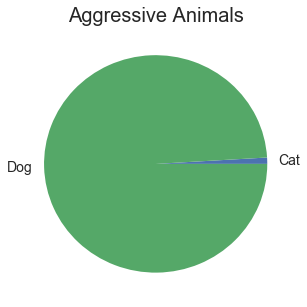

In [38]:
data[data["OutcomeSubtype"]=="Aggressive"].groupby("AnimalType").size().plot(kind="pie", figsize=(5,5),fontsize=14)
plt.title("Aggressive Animals", fontsize=20)
plt.ylabel("")
plt.show()

In [39]:
# OutcomeType and Subtype combinations
data.groupby(["OutcomeType","OutcomeSubtype"]).size()

OutcomeType  OutcomeSubtype     
Adoption     Barn                      1
             Foster                 1800
             Offsite                 165
Died         At Vet                    4
             Enroute                   8
             In Foster                52
             In Kennel               114
             In Surgery                3
Euthanasia   Aggressive              320
             Behavior                 86
             Court/Investigation       6
             Medical                  66
             Rabies Risk              74
             Suffering              1002
Transfer     Barn                      1
             Partner                7816
             SCRP                   1599
dtype: int64

In [40]:
# Animal Type Adoption Ratio
dogs = 15595
cats = 11134
total = dogs + cats

def animal_outcome_ratio_stats(outcome,print_info=True):
    d = data[(data["AnimalType"] == "Dog") & (data["OutcomeType"] == outcome)].shape[0]
    c = data[(data["AnimalType"] == "Cat") & (data["OutcomeType"] == outcome)].shape[0]
    ratio_dogs = float(d) / float(dogs)
    ratio_cats = float(c) / float(cats)
    if print_info==True:
        print(outcome)
        print("Dogs: {}".format(round(ratio_dogs*100,2)))
        print("Cats: {}".format(round(ratio_cats*100,2)))
    return (ratio_dogs,ratio_cats)

animal_outcome_ratio_stats("Adoption")

Adoption
Dogs: 41.66
Cats: 38.37


(0.41660788714331515, 0.3836895994251841)

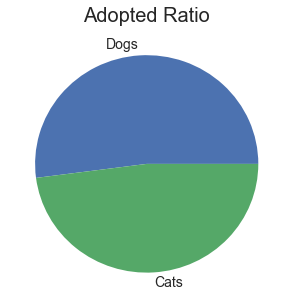

In [41]:
def animal_type_ratio_pie(outcome,title):
    ratio_dogs,ratio_cats = animal_outcome_ratio_stats(outcome,print_info=False)
    series = pd.Series([round(ratio_dogs*100,2),round(ratio_cats*100,2)], index=['Dogs', 'Cats'], name=title)
    series.plot(kind="pie",figsize=(5,5),fontsize=14)
    plt.title(title, fontsize=20)
    plt.ylabel("")
    return plt

animal_type_ratio_pie("Adoption","Adopted Ratio").show()

In [42]:
# Animal Type Euthanasia Ratio
animal_outcome_ratio_stats("Euthanasia")

Euthanasia
Dogs: 5.42
Cats: 6.38


(0.05418403334402052, 0.06376863660858631)

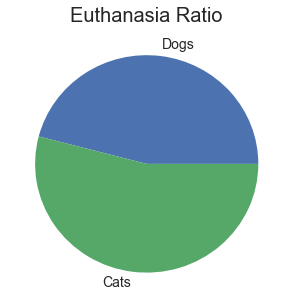

In [43]:
animal_type_ratio_pie("Euthanasia","Euthanasia Ratio").show()

In [44]:
# Animal Type Died Ratio
animal_outcome_ratio_stats("Died")

Died
Dogs: 0.32
Cats: 1.32


(0.0032061558191728116, 0.013202802227411532)

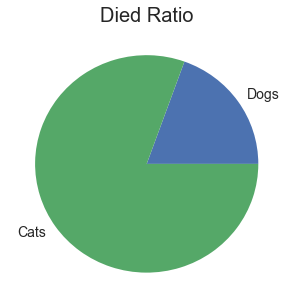

In [45]:
animal_type_ratio_pie("Died","Died Ratio").show()

In [46]:
# Animal Type Transfer Ratio
animal_outcome_ratio_stats("Transfer")

Transfer
Dogs: 25.12
Cats: 49.44


(0.2511702468739981, 0.49443147116939107)

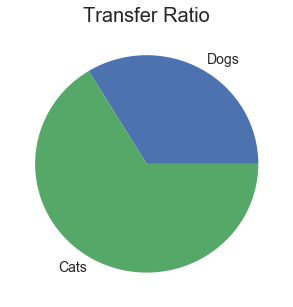

In [47]:
animal_type_ratio_pie("Transfer","Transfer Ratio").show()

[INDEX](#id)

### SexuponOutcome <a class="anchor" id="sex"></a>

In [48]:
# Sex count
data.groupby(["SexuponOutcome"]).size()

SexuponOutcome
Intact Female    3511
Intact Male      3525
Neutered Male    9779
Spayed Female    8820
Unknown          1093
dtype: int64

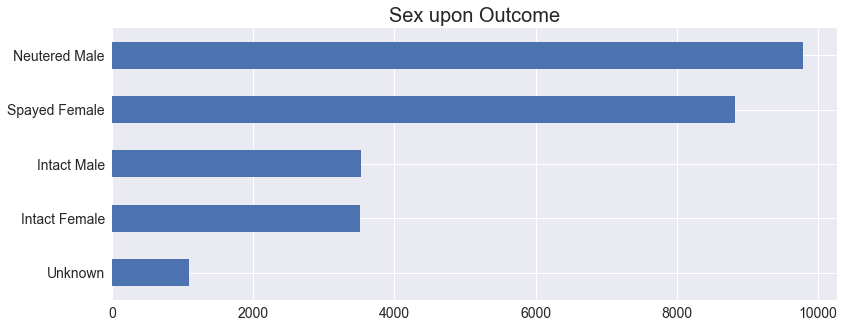

In [49]:
data.groupby(["SexuponOutcome"]).size().sort_values(ascending=True).plot(kind="barh",figsize=(13,5),fontsize=14)
plt.title("Sex upon Outcome", fontsize=20)
plt.ylabel("")
plt.show()

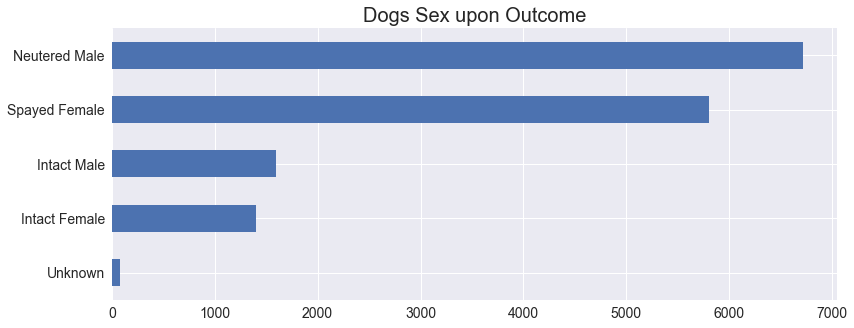

In [50]:
data[data["AnimalType"]=="Dog"].groupby(["SexuponOutcome"]).size().sort_values(ascending=True).plot(kind="barh",figsize=(13,5),fontsize=14)
plt.title("Dogs Sex upon Outcome", fontsize=20)
plt.ylabel("")
plt.show()

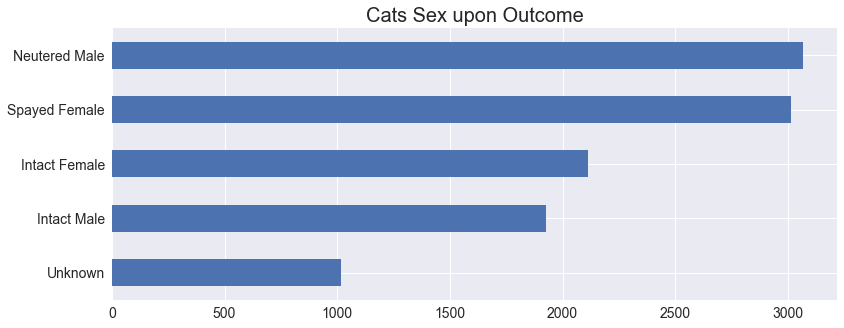

In [51]:
data[data["AnimalType"]=="Cat"].groupby(["SexuponOutcome"]).size().sort_values(ascending=True).plot(kind="barh",figsize=(13,5),fontsize=14)
plt.title("Cats Sex upon Outcome", fontsize=20)
plt.ylabel("")
plt.show()

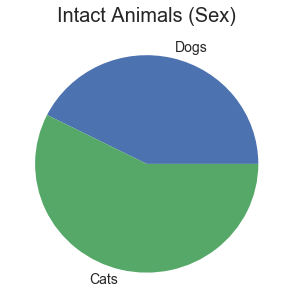

In [52]:
# Non-Neutered/Spayed per Animal type
df = data[(data["SexuponOutcome"] == "Intact Female") | (data["SexuponOutcome"] == "Intact Male")]
dogs_non_neutered = df[df["AnimalType"] == "Dog"]["AnimalType"].count()
cats_non_neutered = df[df["AnimalType"] == "Cat"]["AnimalType"].count()
df = pd.Series([dogs_non_neutered,cats_non_neutered], index=['Dogs', 'Cats'])
df.plot(kind="pie",figsize=(5,5),fontsize=14)
plt.title("Intact Animals (Sex)", fontsize=20)
plt.ylabel("")
plt.show()

[INDEX](#id)

### AgeuponOutcome <a class="anchor" id="age"></a>

In [53]:
# Clean plural and singular words. ["years", "year"] = "years"
def clean_age(data):
    if pd.isnull(data):
        return "1 years"
    n = data.split(" ")[0]
    w = data.split(" ")[1]
    if w == "day" or w == "days":
        return n + " days"
    elif w == "week" or w == "weeks":
        return n + " weeks"
    elif w == "month" or w == "months":
        return n + " months"
    elif w == "year" or w == "years":
        return n + " years"
    pass

data["AgeuponOutcome"] = data["AgeuponOutcome"].apply(clean_age)

In [54]:
data.groupby(["AgeuponOutcome"]).size().sort_values(ascending=False).head(10)

AgeuponOutcome
1 years     3987
2 years     3742
2 months    3397
3 years     1823
1 months    1281
3 months    1277
4 years     1071
5 years      992
4 months     888
6 years      670
dtype: int64

In [55]:
# Convert to days and store on AgeDaysuponOutcome column
def convert_to_days(data):
    if pd.isnull(data):
        return 0
    n = data.split(" ")[0]
    w = data.split(" ")[1]
    if w == "day" or w == "days":
        return int(n)
    elif w == "week" or w == "weeks":
        return int(n) * 7
    elif w == "month" or w == "months":
        return int(n) * 31
    elif w == "year" or w == "years":
        return int(n) * 365
    pass

data["AgeDaysuponOutcome"] = data["AgeuponOutcome"].apply(convert_to_days)

In [56]:
# Age count in days, top 10
data.groupby(["AgeDaysuponOutcome"]).size().sort_values(ascending=False).head(10)

AgeDaysuponOutcome
365     3987
730     3742
62      3397
1095    1823
31      1281
93      1277
1460    1071
1825     992
124      888
2190     670
dtype: int64

In [57]:
# Min, Max, Mean age
min_dog = round(float(data[data["AnimalType"]=="Dog"]["AgeDaysuponOutcome"].min())/365,2)
max_dog = round(float(data[data["AnimalType"]=="Dog"]["AgeDaysuponOutcome"].max())/365,2)
mean_dog = round(data[data["AnimalType"]=="Dog"]["AgeDaysuponOutcome"].mean()/365,2)

min_cat = round(float(data[data["AnimalType"]=="Cat"]["AgeDaysuponOutcome"].min())/365,2)
max_cat = round(float(data[data["AnimalType"]=="Cat"]["AgeDaysuponOutcome"].max())/365,2)
mean_cat = round(data[data["AnimalType"]=="Cat"]["AgeDaysuponOutcome"].mean()/365,2)

print("Dog age. Min: {} Max: {} Mean: {}".format(min_dog,max_dog,mean_dog))
print("Cat age. Min: {} Max: {} Mean: {}".format(min_cat,max_cat,mean_cat))

Dog age. Min: 0.0 Max: 19.0 Mean: 2.76
Cat age. Min: 0.0 Max: 20.0 Mean: 1.36


[INDEX](#id)

### Breed <a class="anchor" id="breed"></a>

In [58]:
# Top 10 breed
data.groupby("Breed").size().sort_values(ascending=False).head(10)

Breed
Domestic Shorthair Mix       8810
Pit Bull Mix                 1906
Chihuahua Shorthair Mix      1766
Labrador Retriever Mix       1363
Domestic Medium Hair Mix      839
German Shepherd Mix           575
Domestic Longhair Mix         520
Siamese Mix                   389
Australian Cattle Dog Mix     367
Dachshund Mix                 318
dtype: int64

In [59]:
# Number of breeds
data.groupby("Breed").size().count()

1380

In [60]:
# New column with general large breeds:
#
# "Pit Bull Mix" and "Pit Bull" count as Pit Bull.
# Akita/Chow Chow  and Akita/Siberian Husky count as Akita.
# "Domestic Shorthair" and "Domestic Largehair" count as Domestic. Same with medium and large
#
def remove_mix(data):
    c = data.split("Mix")[0]
    c = c.split("/")[0]
    c = c.split("Short")[0]
    c = c.split("Long")[0]
    c = c.split("Medium")[0]
    return c.strip()
data["LargeBreed"] = data["Breed"].apply(remove_mix)
# Top 10 large-breed

data.groupby("LargeBreed").size().sort_values(ascending=False).head(10)

LargeBreed
Domestic                 10388
Chihuahua                 2313
Pit Bull                  2113
Labrador Retriever        1915
German Shepherd            826
Dachshund                  564
Australian Cattle Dog      511
Siamese                    426
Boxer                      360
Border Collie              334
dtype: int64

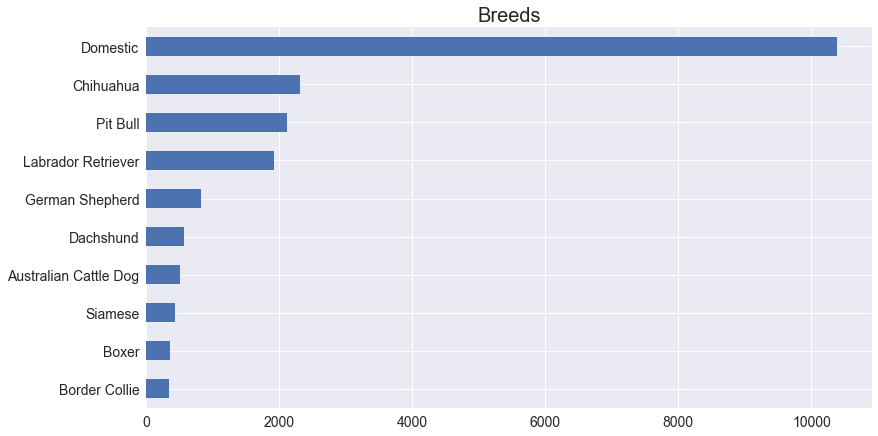

In [61]:
data.groupby("LargeBreed").size().sort_values(ascending=True).tail(10).plot(kind="barh",fontsize=14,figsize=(13,7))
plt.title("Breeds", fontsize=20)
plt.ylabel("")
plt.show()

In [62]:
# Number of breeds ignoring the Mix
data.groupby("LargeBreed").size().count()

216

In [63]:
# Large-breed by Cat
data[data["AnimalType"]== "Cat"].groupby("LargeBreed").size().sort_values(ascending=False).head(10)

LargeBreed
Domestic        10388
Siamese           426
Snowshoe           78
Manx               48
Maine Coon         47
Russian Blue       35
Himalayan          18
Persian            14
Ragdoll            12
American            9
dtype: int64

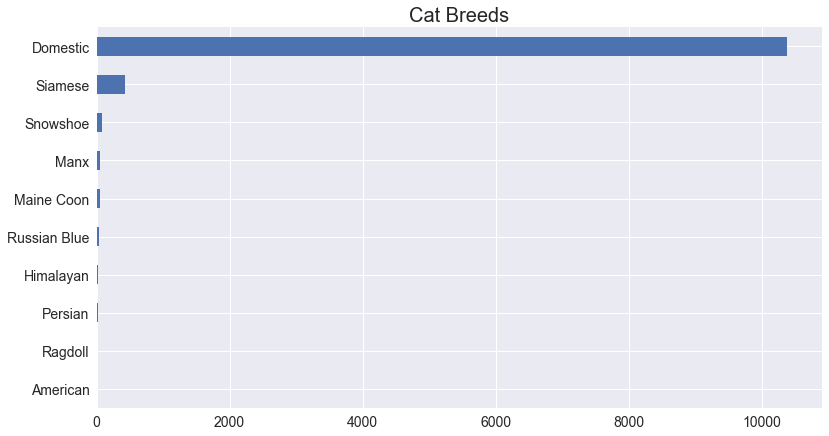

In [64]:
data[data["AnimalType"]== "Cat"].groupby("LargeBreed").size().sort_values(ascending=True).tail(10).plot(kind="barh",fontsize=14,figsize=(13,7),title="Cat Breeds")
plt.title("Cat Breeds", fontsize=20)
plt.ylabel("")
plt.show()

In [65]:
# Large-breed by Dog
data[data["AnimalType"]== "Dog"].groupby("LargeBreed").size().sort_values(ascending=False).head(10)

LargeBreed
Chihuahua                2313
Pit Bull                 2113
Labrador Retriever       1915
German Shepherd           826
Dachshund                 564
Australian Cattle Dog     511
Boxer                     360
Border Collie             334
Miniature Poodle          310
Australian Shepherd       229
dtype: int64

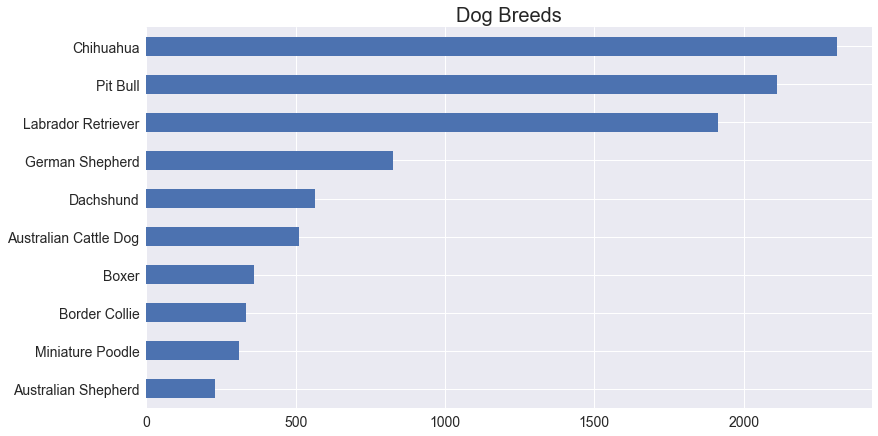

In [66]:
data[data["AnimalType"]== "Dog"].groupby("LargeBreed").size().sort_values(ascending=True).tail(10).plot(kind="barh",fontsize=14,figsize=(13,7),title="Dog Breeds")
plt.title("Dog Breeds", fontsize=20)
plt.ylabel("")
plt.show()

In [67]:
# Top 10 Most aggressive Dog Breeds
data[(data["AnimalType"] == "Dog") & (data["OutcomeSubtype"]== "Aggressive")].groupby("LargeBreed").size().sort_values(ascending=False).head(10)

LargeBreed
Pit Bull                          160
Labrador Retriever                 40
German Shepherd                    14
Australian Cattle Dog              12
Rottweiler                          9
Boxer                               8
American Bulldog                    7
Staffordshire                       7
Catahoula                           6
American Staffordshire Terrier      5
dtype: int64

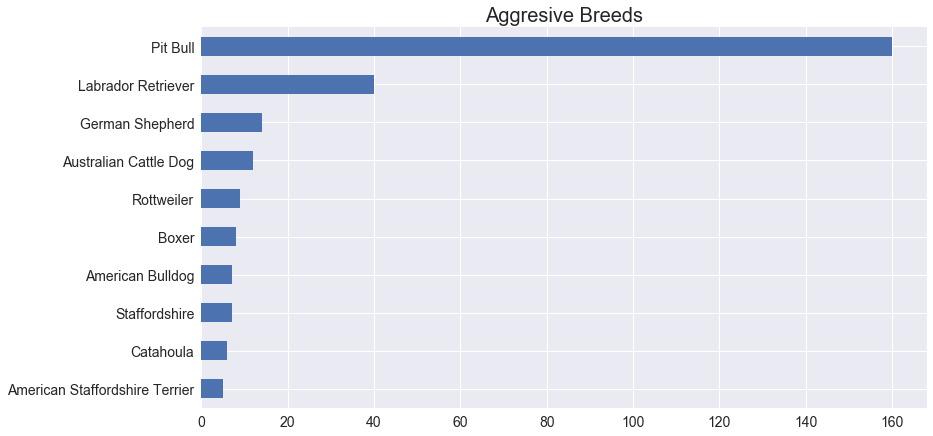

In [68]:
agg = data[(data["AnimalType"] == "Dog") & (data["OutcomeSubtype"]== "Aggressive")].groupby("LargeBreed").size().sort_values(ascending=True).tail(10)
agg.plot(kind="barh",fontsize=14,figsize=(13,7),title="Aggressive Breeds")
plt.title("Aggresive Breeds", fontsize=20)
plt.ylabel("")
plt.show()

[INDEX](#id)

### Color <a class="anchor" id="color"></a>

In [69]:
# Get basic color name
def convert_color(data):
    c = data.split(" ")[0]
    c = c.split("/")[0]
    return c

data["BasicColor"] = data["Color"].apply(convert_color)
data.groupby(["BasicColor"]).size().sort_values(ascending=False).head(10)

BasicColor
Black       6646
Brown       5318
White       3344
Blue        2149
Tan         1674
Orange      1343
Red          871
Tricolor     800
Tortie       614
Calico       579
dtype: int64

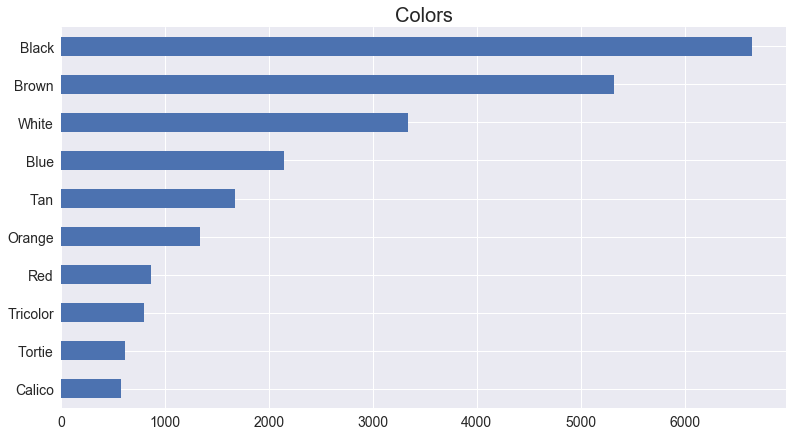

In [70]:
data.groupby(["BasicColor"]).size().sort_values(ascending=True).tail(10).plot(kind="barh",fontsize=14,figsize=(13,7),title="Colors")
plt.title("Colors", fontsize=20)
plt.ylabel("")
plt.show()

In [71]:
# Basic colors - Cats top 10
data[data["AnimalType"]=="Cat"].groupby(["BasicColor"]).size().sort_values(ascending=False).head(10)

BasicColor
Black     2667
Brown     2600
Blue      1405
Orange    1338
Tortie     614
White      595
Calico     579
Torbie     398
Cream      298
Lynx       183
dtype: int64

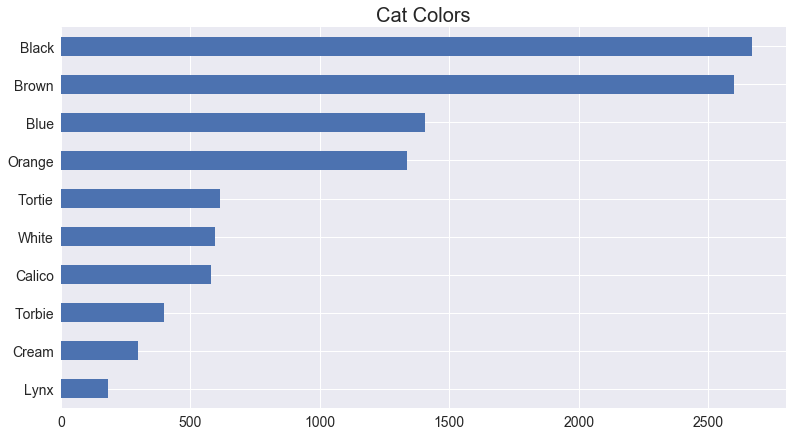

In [72]:
data[data["AnimalType"]=="Cat"].groupby(["BasicColor"]).size().sort_values(ascending=True).tail(10).plot(kind="barh",fontsize=14,figsize=(13,7),title="Cat Colors")
plt.title("Cat Colors", fontsize=20)
plt.ylabel("")
plt.show()

In [73]:
# Basic colors - Cats top 10
data[data["AnimalType"]=="Dog"].groupby(["BasicColor"]).size().sort_values(ascending=False).head(10)

BasicColor
Black        3979
White        2749
Brown        2718
Tan          1673
Red           871
Tricolor      798
Blue          744
Chocolate     433
Sable         324
Buff          262
dtype: int64

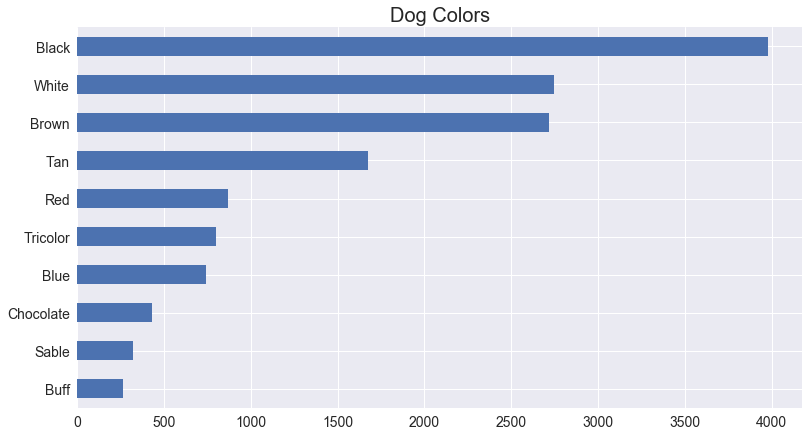

In [74]:
data[data["AnimalType"]=="Dog"].groupby(["BasicColor"]).size().sort_values(ascending=True).tail(10).plot(kind="barh",fontsize=14,figsize=(13,7),title="Dog Colors")
plt.title("Dog Colors", fontsize=20)
plt.ylabel("")
plt.show()

[INDEX](#id)

In [75]:
# Save DataFrame state to disk
data.to_pickle("data_after_first_step.pkl")